La regla XOR tiene dos entradas (+1 o -1) y la salida es -1 si ambas son diferentes y +1 si ambas son iguales. Utilizar el algoritmo de retropropagación de errores para aprender el XOR en las siguientes arquitecturas. En ambos casos incluir unidades de entrada adicional para simular los umbrales. Utilizar tanh(x) como función transferencia. Repetir el proceso para 10 condiciones inciales de las conexiones. Comparar el tiempo medio de convergencia de ambas arquitecturas.

In [161]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Funciones de activación
def act(z):
    return np.tanh(z)

def act_der(z):
    return 1.0 - np.tanh(z)**2

# Entradas y salidas
X = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
y = np.array([[-1], [1], [1], [-1]])

In [124]:
# Inicializo los valores de los wm, donde el m es el número de capa (0 la entrada, 1 la oculta y 2 la salida) y Nm el número de elementos
def initialize(N0, N1, N2):
    w1 = 2 * np.random.randn(N0, N1) - 1
    w2 = 2 * np.random.randn(N1, N2) - 1

    b1 = np.random.randn(N1)
    b2 = np.random.randn(N2)

    return w1, w2, b1, b2

# Propago hacia adelante
def forward(X, w1, w2, b1, b2):
    h1 = np.dot(X, w1) + b1
    V1 = act(h1)
    h2 = np.dot(V1, w2) + b2
    V2 = act(h2)

    return h1, h2, V1, V2

# Propago hacia atrás el error
def backward(X, y, w1, w2, b1, b2, h1, h2, V1, V2, lr):
    error = y - V2
    dh2 = error * act_der(h2)
    dw2 = np.dot(V1.T, dh2)
    db2 = np.sum(dh2, axis=0)
    
    dV1 = np.dot(dh2, w2.T)
    dh1 = dV1 * act_der(h1) # Había un error acá
    dw1 = np.dot(X.T, dh1)
    db1 = np.sum(dh1, axis=0)

    # Actualizo los pesos y los bias
    w2 += lr * dw2
    b2 += lr * db2
    w1 += lr * dw1
    b1 += lr * db1

    return w1, w2, b1, b2

# Función que devuelve la respuesta de la red
def predict(X, w1, w2, b1, b2):
    return forward(X, w1, w2, b1, b2)[-1]

# Entreno a la red
def train(epochs, X, y, N0, N1, N2, lr, epsilon = 0.1):

    #np.random.seed(42)

    # Inicializo las matrices y los umbrales
    w1, w2, b1, b2 = initialize(N0, N1, N2)

    errors = []
    accuracies = []

    for epoch in range(epochs):
        # Propago la señal hacia adelante
        h1, h2, V1, V2 = forward(X, w1, w2, b1, b2)

        # Computo los errores
        error = np.mean(np.square(y-V2))
        errors.append(error)

        # Computo la precisión
        accuracy = np.abs(np.sum(np.abs(V2 - y) < epsilon))
        accuracies.append(accuracy/len(y))

        # Propago hacia atrás y cambio las variables
        w1, w2, b1, b2 = backward(X, y, w1, w2, b1, b2, h1, h2, V1, V2, lr)

    return errors, accuracies, predict(X, w1, w2, b1, b2)

In [163]:
N_experimentos = 10
MSE = []
accuracy = []

np.random.seed(11)

i = 0
while i < 11:
    err, acc, _ = train(2000, X, y, N0 = 2, N1 = 2, N2 = 1, lr = 0.1)

    if err[-1] < 0.1:
        MSE.append(err)
        accuracy.append(np.array(acc))
        i += 1

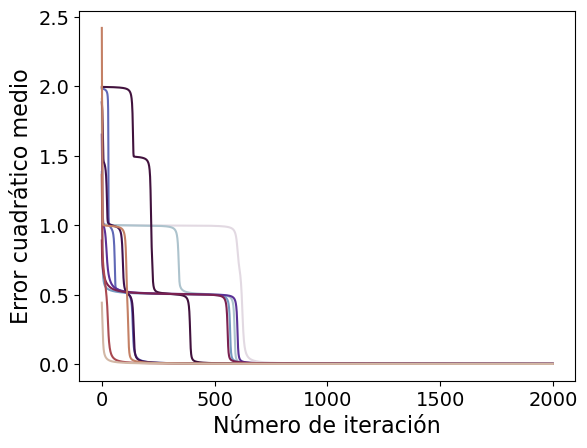

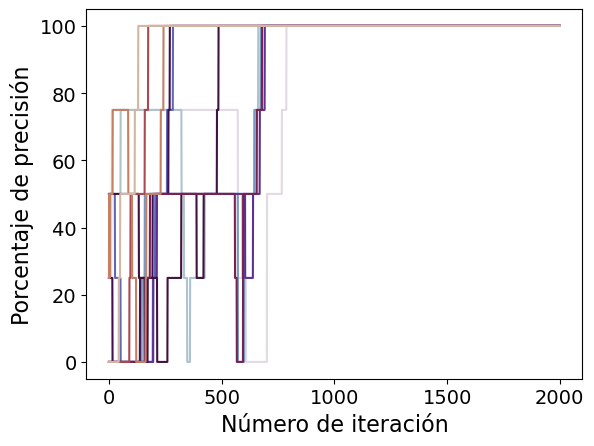

In [165]:
cm = plt.get_cmap('twilight')

for i in range(len(MSE)):
    plt.plot(MSE[i], color=cm(i/len(MSE)))

plt.xlabel('Número de iteración', fontsize=16)
plt.ylabel('Error cuadrático medio', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('/Users/manuchito/Documents/Balseiro/Redes neuronales/Práctica 4/figuras/1_MSE_1.png', dpi=900, bbox_inches='tight')
plt.figure()

N_epoch = np.linspace(0, 2000, 2000)

for i in range(len(accuracy)):
    plt.plot(N_epoch, 100*accuracy[i], color=cm(i/len(MSE)))

plt.xlabel('Número de iteración', fontsize=16)
plt.ylabel('Porcentaje de precisión', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('/Users/manuchito/Documents/Balseiro/Redes neuronales/Práctica 4/figuras/1_acc_1.png', dpi=900, bbox_inches='tight')

In [162]:
# Tiempo de iteración
time_conv = []
for mse in MSE:
    time_conv.append(np.where(np.array(mse) < 0.2)[0][0])

print(f"El tiempo medio de convergencia es {np.array(time_conv).mean()}")

El tiempo medio de convergencia es 343.6363636363636
